a. To find the curvature information on concavity, we can look at the second derivative of the function and based on the sign (positive for convex, negative for concave) we will determine the functions concavity. 

In [1]:
#Derivative were solved on paper and then translated in the comments
#Inverses provided so that we can find the minimum instead of the maximum

f(x) = 500 - x*(x-20)^3

invf(x) = x*(x-20)^3 - 500

∇f(x) = -(x-20)^3 - 3x*(x-20)^2

inv∇f(x) = (x-20)^3 + 3x*(x-20)^2
# f'(x) = -x^3 + 60x^2 - 1200x + 8000 - 3x^2 + 120x^2 - 1200x
#       = -4x^3 + 180x^2 - 2400x + 8000        
f2(x) = -12x^2 + 360x - 2400

f2 (generic function with 1 method)

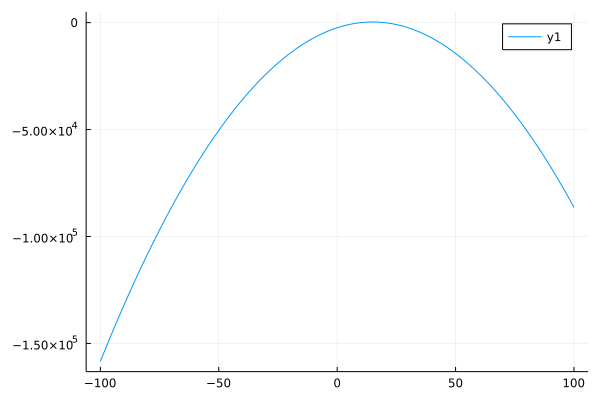

In [2]:
using Plots

x = range(-100,100)
plot(x, f2)

As we can see from f2 (its highest order term being <0) and the plot of the second derivative of the function f, the derivative is almost always < 0 making f a concave function. 

In [4]:
using LinearAlgebra

function wolfe(x,p)
    a = 1
    change = 0.75
    c = 1e-4
    d = 0.9
    while (invf(x + a*p) > invf(x) + c*a*inv∇f(x)*p) || (inv∇f(x + a*p) * p > d*inv∇f(x)*p) 
        #Sufficient decrease and curvature condition
        a = change * a
    end
    return a
end

function steepest_descent(f, ∇f, x; ϵ=1e-3, k=10)
    i = 1
    while norm(∇f(x)) > ϵ
        p = -∇f(x)   # steepest descent direction
        α = wolfe(x,p)
        x = x + α*p  # the new iterate
        i % k == 0 && println("iteration ", i, ". x = ", x)
        i += 1
    end
    return x
end

x0 = -10
x = steepest_descent(invf, inv∇f, x0, k=1)

iteration 1. x = -9.2759258683621
iteration 2. x = -8.619667544047982
iteration 3. x = -8.021331812016948
iteration 4. x = -7.472951044539126
iteration 5. x = -6.799714251590215
iteration 6. x = -6.1936483961202535
iteration 7. x = -5.644421687610396
iteration 8. x = -5.143815871873099
iteration 9. x = -4.685197199293269
iteration 10. x = -4.263141596507874
iteration 11. x = -3.7431706177206436
iteration 12. x = -3.2731973919871487
iteration 13. x = -2.845917722321658
iteration 14. x = -2.455447694754583
iteration 15. x = -2.0969850534435213
iteration 16. x = -1.6564247040890243
iteration 17. x = -1.2595256930668208
iteration 18. x = -0.8998475545469131
iteration 19. x = -0.5722108868375793
iteration 20. x = -0.2723947850434851
iteration 21. x = 0.003081048212865589
iteration 22. x = 0.34179468992624457
iteration 23. x = 0.6469427189804022
iteration 24. x = 0.9233170829316306
iteration 25. x = 1.1748048505634578
iteration 26. x = 1.40459784282393
iteration 27. x = 1.6153455386310962
it

4.999998942674834

In [8]:
f(x)

17374.99999999959

The optimal value of the function f(x*) or in other words, the maximum of the function is approximately 17375 and the approximate value of x that achieves this value is x* = 5. We can also see that this result is correct based on the plot below.

The starting value is kind of aribitrary since the model gets the correct result for closer and further values pretty quickly so I thought that -10 was a random and far enough starting point to see whether or not the algorithm was actually working properly.

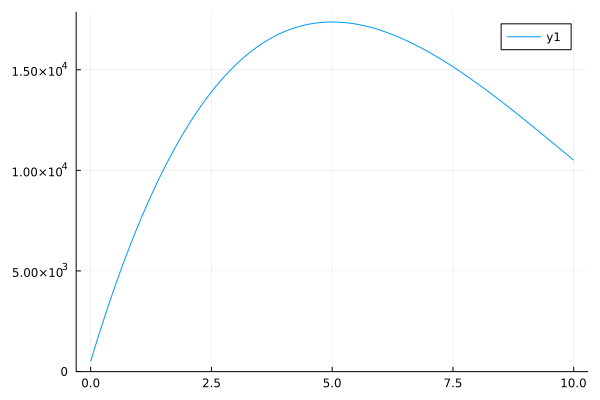

In [12]:
dom = range(0, 10, length=10000)
plot(dom, f.(dom))